In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3) , activation='relu' , input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')
                                
                                    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 22s 6ms/step - loss: 0.4346 - accuracy: 0.8419
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2875 - accuracy: 0.8941
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2440 - accuracy: 0.9090
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2124 - accuracy: 0.9210
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1859 - accuracy: 0.9303


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2688 - accuracy: 0.9091


[0.268809974193573, 0.9090999960899353]

Visualising the output at each convolution and max pool layer

In [10]:
print(y_test[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

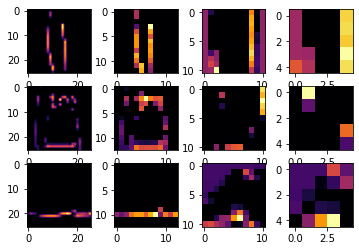

In [14]:


f, axarr = plt.subplots(3,4)

FIRST_IMAGE=2
SECOND_IMAGE=1
THIRD_IMAGE=0
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)